 # Problem

predict the amount a customer is willing to pay for a car purchase


# Import Libs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
data = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')
data.head()

# Visualization


In [ ]:
sns.pairplot(data)

In [ ]:
X = data.drop(columns=['Customer Name', 'Customer e-mail','Country','Car Purchase Amount'],axis=1,inplace=False)
y = data['Car Purchase Amount']

In [ ]:
X.head(),y.head()

In [ ]:
X.shape, y.shape

# Min-Max Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled
scaler.data_max_, scaler.data_min_

In [ ]:
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))
y_scaled
scaler.data_max_, scaler.data_min_

# Training a Model

In [ ]:
#training a neural network

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled)
        


In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

In [79]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
#min-max scaler

model = Sequential()
model.add(Dense(50 , input_dim = 5, activation = 'relu'))
model.add(Dense(50 , activation = 'relu'))
model.add(Dense(1  , activation='linear'))


In [80]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                300       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer='adam', loss ='mean_squared_error')


In [82]:
epochs_hist = model.fit(X_train,y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2,)


Epoch 1/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0359 - val_loss: 0.0237
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.0150
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.0097
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0062
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0052
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 11/100
6/6 [==========

# Evaluating the Model

In [83]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

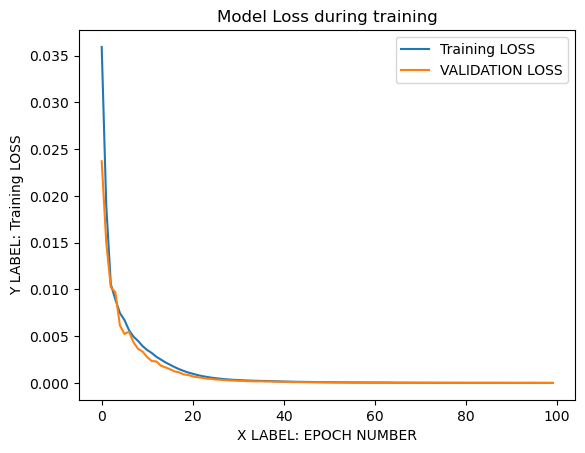

In [84]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss during training')
plt.ylabel('Y LABEL: Training LOSS')
plt.xlabel('X LABEL: EPOCH NUMBER')
plt.legend(['Training LOSS', 'VALIDATION LOSS'])

In [87]:
 y_predict = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step
